In [1]:
from matplotlib import pyplot as plt
import numpy as np
import torch

from reggae.gp.exact import AnalyticalLFM, Trainer
from reggae.data_loaders import P53Data
from reggae.gp.options import Options
from reggae.plot.variational_plotters import Plotter

f64 = np.float64

# Linear Latent Force Model Example
Replication of the paper by Lawrence et al., 2006. https://papers.nips.cc/paper/3119-modelling-transcriptional-regulation-using-gaussian-processes.pdf

### Probesets

The original paper restricted their interest to 5 known targets of p53:

| Target       | Probeset     | Aliases    |
| :------------- | :----------: | :----------- |
| DDB2 |  203409_at    | |
| p21   | 202284_s_at | p21CIP1, CDKN1A |
| SESN1/hPA26   | 218346_s_at |  |
| BIK   | 205780_at |  |
| TNFRSF10b   | 209294_x_at, 209295_at, 210405_x_at |  |

In [2]:
dataset = P53Data(replicate=0)
num_genes = 5
num_tfs = 1
num_replicates = 1
num_times = 7

m_observed = torch.stack([
    dataset[i][1] for i in range(num_genes*num_replicates)
]).view(num_replicates, num_genes, num_times)

t_observed = torch.linspace(0, 12, 7).view(-1)
t_predict = torch.linspace(-1, 13, 80, dtype=torch.float64)

options = Options()

y = torch.tensor(m_observed).reshape(-1)

C:\Users\Jacob\miniconda3\envs\wishart\lib\site-packages\ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


In [3]:
model = AnalyticalLFM(num_genes, dataset, dataset.variance.reshape(-1))
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
trainer = Trainer(model, optimizer)
plotter = Plotter(model, dataset.gene_names)

In [13]:
trainer.train(epochs=100)

Iter 1/100 - Loss: 0.670   lengthscale: 2.224   noise: 0.002
Iter 11/100 - Loss: 0.666   lengthscale: 2.162   noise: 0.002
Iter 21/100 - Loss: 0.664   lengthscale: 2.135   noise: 0.001
Iter 31/100 - Loss: 0.662   lengthscale: 2.138   noise: 0.001
Iter 41/100 - Loss: 0.660   lengthscale: 2.144   noise: 0.001
Iter 51/100 - Loss: 0.659   lengthscale: 2.143   noise: 0.001
Iter 61/100 - Loss: 0.658   lengthscale: 2.139   noise: 0.001
Iter 71/100 - Loss: 0.657   lengthscale: 2.138   noise: 0.001
Iter 81/100 - Loss: 0.657   lengthscale: 2.139   noise: 0.001
Iter 91/100 - Loss: 0.656   lengthscale: 2.140   noise: 0.001


torch.Size([1, 5, 7])


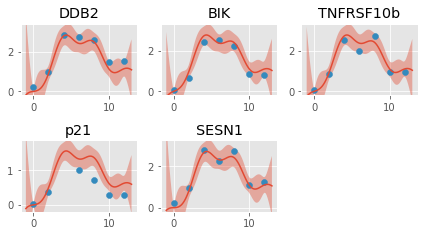

In [14]:
print(m_observed.shape)
t_predict = torch.linspace(-1, 12+1, 100)
m = plotter.plot_outputs(t_predict, t_scatter=t_observed, y_scatter=m_observed)

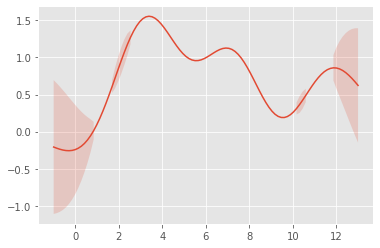

In [15]:
pred_f, var = model.predict_f(t_predict)
pred_f, var = pred_f.detach(), torch.sqrt(var).detach()
plt.plot(t_predict, pred_f)
plt.fill_between(t_predict, pred_f + var, pred_f - var, alpha=0.2)

C:\Users\Jacob\Documents\proj\reggae\reggae\plot\variational_plotters.py:104: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(plotnum)


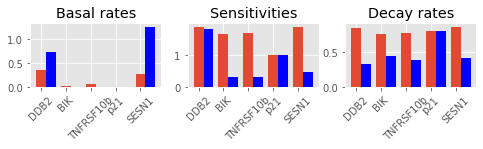

In [12]:
plotter.plot_kinetics()